# **Stock Price Predictor**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf #data that im working on this in project
%matplotlib inline

In [37]:
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2010-01-01", "2023-01-16", auto_adjust=True)
data.head()

Enter the code of the stock:  GC=F


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,1117.699951,1122.300049,1097.099976,1117.699951,184
2010-01-05,1118.099976,1126.500000,1115.000000,1118.099976,53
2010-01-06,1135.900024,1139.199951,1120.699951,1135.900024,363
2010-01-07,1133.099976,1133.099976,1129.199951,1133.099976,56
2010-01-08,1138.199951,1138.199951,1122.699951,1138.199951,54


In [38]:
data.shape

(3278, 5)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3278 entries, 2010-01-04 to 2023-01-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3278 non-null   float64
 1   High    3278 non-null   float64
 2   Low     3278 non-null   float64
 3   Close   3278 non-null   float64
 4   Volume  3278 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.7 KB


In [40]:
data.describe()

,Open,High,Low,Close,Volume
count,3278.000000,3278.000000,3278.000000,3278.000000,3278.000000
mean,1450.669402,1458.010251,1442.855980,1450.565497,5498.132398
std,249.580025,251.460343,247.755323,249.613821,29495.279441
min,1052.199951,1062.000000,1045.199951,1050.800049,0.000000
25%,1245.549988,1251.350037,1240.000000,1245.500000,44.000000
50%,1341.549988,1349.200012,1333.949951,1341.350037,153.000000
75%,1691.049957,1704.300018,1679.375031,1692.900024,498.500000
max,2053.600098,2072.000000,2040.000000,2051.500000,386334.000000


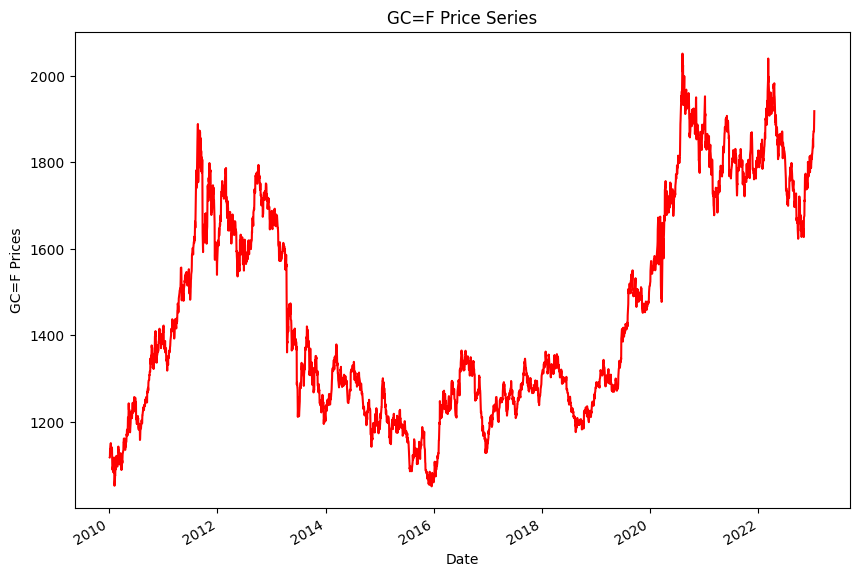

In [41]:
data.Close.plot(figsize=(10,7), color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

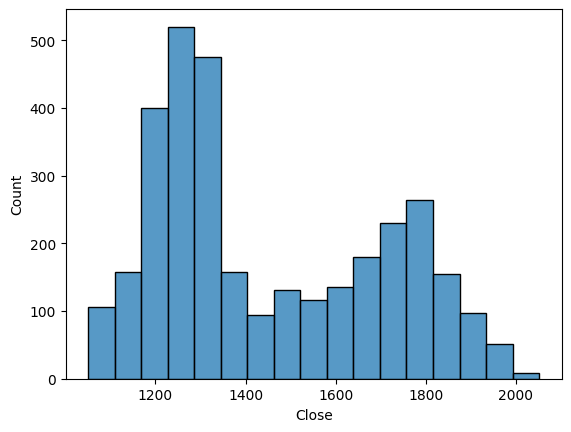

In [42]:
sns.histplot(data["Close"])
plt.show()

<Axes: xlabel='Open', ylabel='Count'>

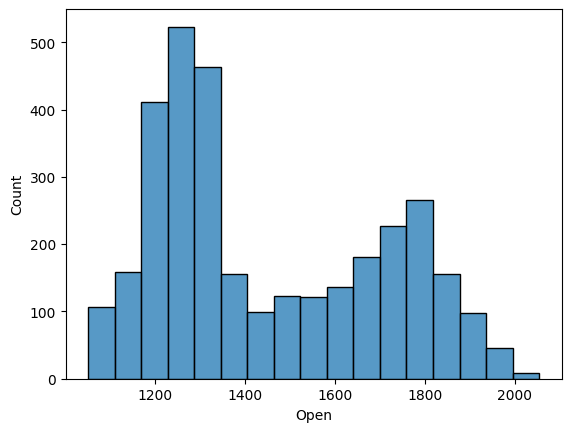

In [43]:
sns.histplot(data["Open"])

<Axes: xlabel='High', ylabel='Count'>

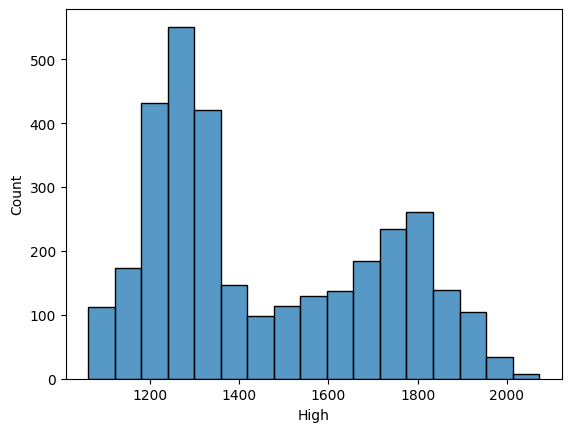

In [44]:
sns.histplot(data["High"])

In [45]:
X = data.drop("Close", axis=1)
y = data["Close"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2622, 4)
(656, 4)
(2622,)
(656,)


In [46]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)  # Assuming y_train is your target variable
pred1 = lr.predict(X_test)

In [47]:
# mse --> mean squared error
# rmse --> root mean squared error
#r2_score --> 1.0 (good model)
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)  #y_test: ground truth,  y_pred: model predicted value
    rmse = np.sqrt(mse)
    r2_scors = r2_score(y_test, y_pred)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R2_score: ", r2_scors)

calculate_metrics(y_test, pred1)
    

MSE:  30.371105323833735
RMSE:  5.510998577738316
R2_score:  0.9995276362405834


In [ ]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train ) 

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

In [49]:
calculate_metrics(y_test, la_p)

MSE:  35.99980495273551
RMSE:  5.999983746039277
R2_score:  0.999440092712319


In [50]:
calculate_metrics(y_test, ri_p)

MSE:  30.37107392708886
RMSE:  5.510995729184415
R2_score:  0.9995276367288989


In [51]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
svr = SVR() 


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.227 total time=   0.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.152 total time=   0.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.179 total time=   0.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.205 total time=   0.4s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.205 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.227 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.152 total time=   0.4s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.179 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.205 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.205 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.227 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)